# COVID-19 Future Forecasting Using Supervised Machine Learning Models

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925


In [4]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1822,1841,1846,1846,1864,1874,1900,1906,1919,1935
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,822,839,852,870,889,905,922,936,951,965
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2447,2464,2480,2492,2501,2516,2527,2539,2554,2564
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,77,77,78,78,78,78,78,78
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,350,351,352,353,354,354,354,355,358,362


In [6]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679


In [8]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [9]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [10]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/1/20', '12/2/20', '12/3/20', '12/4/20', '12/5/20', '12/6/20',
       '12/7/20', '12/8/20', '12/9/20', '12/10/20'],
      dtype='object', length=328)

In [11]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [12]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,0,0,0,0,0,0,0,0,0,0,...,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053
1,0,0,0,0,0,0,0,0,0,0,...,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061
2,0,0,0,0,0,0,0,0,0,0,...,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579
3,0,0,0,0,0,0,0,0,0,0,...,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190
4,0,0,0,0,0,0,0,0,0,0,...,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925
5,0,0,0,0,0,0,0,0,0,0,...,142,144,144,144,144,144,146,146,146,146
6,0,0,0,0,0,0,0,0,0,0,...,1432570,1440103,1447732,1454631,1459832,1463110,1466309,1469919,1475222,1482216
7,0,0,0,0,0,0,0,0,0,0,...,135967,137231,138508,139692,140959,141937,142344,142928,144066,145240
8,0,0,0,0,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,0,0,0,0,3,4,4,4,4,4,...,4588,4597,4603,4605,4610,4614,4620,4622,4624,4633


In [13]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,0,0,0,0,0,0,0,0,0,0,...,1822,1841,1846,1846,1864,1874,1900,1906,1919,1935
1,0,0,0,0,0,0,0,0,0,0,...,822,839,852,870,889,905,922,936,951,965
2,0,0,0,0,0,0,0,0,0,0,...,2447,2464,2480,2492,2501,2516,2527,2539,2554,2564
3,0,0,0,0,0,0,0,0,0,0,...,76,76,77,77,78,78,78,78,78,78
4,0,0,0,0,0,0,0,0,0,0,...,350,351,352,353,354,354,354,355,358,362
5,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
6,0,0,0,0,0,0,0,0,0,0,...,38928,39156,39305,39512,39632,39770,39888,40009,40222,40431
7,0,0,0,0,0,0,0,0,0,0,...,2193,2228,2254,2277,2309,2326,2344,2372,2393,2416
8,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


In [14]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,0,0,0,0,0,0,0,0,0,0,...,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099
1,0,0,0,0,0,0,0,0,0,0,...,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609
2,0,0,0,0,0,0,0,0,0,0,...,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135
3,0,0,0,0,0,0,0,0,0,0,...,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505
4,0,0,0,0,0,0,0,0,0,0,...,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679
5,0,0,0,0,0,0,0,0,0,0,...,130,133,133,133,133,133,134,134,138,138
6,0,0,0,0,0,0,0,0,0,0,...,1263251,1268358,1274675,1281955,1288785,1294692,1300696,1305587,1311488,1318187
7,0,0,0,0,0,0,0,0,0,0,...,110365,111795,113228,114990,116066,116796,117649,119147,120532,121882
8,0,0,0,0,0,0,0,0,0,0,...,112,112,112,113,113,113,113,114,114,114
9,0,0,0,0,0,0,0,0,2,2,...,3183,3183,3186,3186,3186,3186,3186,3190,3191,3191


In [15]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
india_cases = []

# Death
india_deaths = []

# Recovered
india_recoveries = []

In [16]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84123,
 86013,
 88394,
 90377,
 92963,
 95279,
 98044,
 102043,
 106109,
 110058,
 114027,
 119052,
 126702,
 132492,
 146879,
 157952,
 169222,
 184032,
 199976,
 219535,
 246584,
 277361,
 309363,
 343679,
 387045,
 428455,
 479489,
 542352,
 607469,
 674773,
 734025,
 799411,
 876288,
 952799,
 1034089,
 1117368,
 1197751,
 1269728,
 1342938,
 1420723,
 1505115,
 1591308,
 1678725,
 1754891,
 1850360,
 1920520,
 1991778,
 2073664,
 2170502,
 2258252,
 2331730,
 2411760,
 2486338,
 2562292,
 2639997,
 2727920,
 2812308,
 2895700,
 2967573,
 3037307,
 3112773,
 3190203,
 3273574,
 3360772,
 3440772,
 3517290,
 3594385,
 3674853,
 3764797,
 3853808,
 3944935,
 4029856,
 4105084,
 4181990,
 4266257,
 4351117

In [18]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9980,
 11459,
 13181,
 14855,
 16797,
 19082,
 21881,
 24902,
 28393,
 32109,
 35585,
 39637,
 44389,
 49897,
 56132,
 62242,
 68409,
 73580,
 79526,
 87754,
 94514,
 102274,
 109675,
 115902,
 121726,
 127630,
 134609,
 142964,
 150251,
 158618,
 164638,
 169899,
 175758,
 182945,
 189674,
 196511,
 203177,
 208812,
 212753,
 217426,
 223972,
 230707,
 236701,
 241851,
 247328,
 250800,
 254899,
 260785,
 267328,
 272620,
 278101,
 282389,
 285982,
 289449,
 294972,
 300048,
 305230,
 310345,
 314522,
 317808,
 321501,
 326221,
 330982,
 335707,
 340902,
 344818,
 347941,
 349142,
 353261,
 358399,
 363020,
 367607,


In [19]:
confirmed_sum

69592554

In [20]:
death_sum

1581856

In [21]:
recovered_sum

44871360

In [22]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [23]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [24]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
india_daily_increase = daily_increase(india_cases)

In [25]:
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2142,
 2184,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 853,
 977,
 1360,
 1387,
 1890,
 2381,
 1983,
 2586,
 2316,
 2765,
 3999,
 4066,
 3949,
 3969,
 5025,
 7650,
 5790,
 14387,
 11073,
 11270,
 14810,
 15944,
 19559,
 27049,
 30777,
 32002,
 34316,
 43366,
 41410,
 51034,
 62863,
 65117,
 67304,
 59252,
 65386,
 76877,
 76511,
 81290,
 83279,
 80383,
 71977,
 73210,
 77785,
 84392,
 86193,
 87417,
 76166,
 95469,
 70160,
 71258,
 81886,
 96838,
 87750,
 73478,
 80030,
 74578,
 75954,
 77705,
 87923,
 84388,
 83392,
 71873,
 69734,
 75466,
 77430,
 83371,
 87198,
 80000,
 76518,
 77095,
 80468,
 89944,
 89011,
 91127,
 84921,
 75228,
 76906,
 84267,
 84860,
 96607,
 96387,
 94211,
 77631,
 88707,
 97250,
 102375,
 106806,
 105979,
 104576,
 94403,
 86430,
 93266,
 103007,
 119500,
 120944,
 136994,
 106549,
 95160,
 

In [26]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [27]:
# deaths
world_daily_death = daily_increase(total_deaths)
india_daily_death = daily_increase(india_deaths)

In [28]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 93,
 112,
 99,
 244,
 184,
 280,
 344,
 306,
 497,
 420,
 641,
 678,
 811,
 903,
 1113,
 1479,
 1722,
 1674,
 1942,
 2285,
 2799,
 3021,
 3491,
 3716,
 3476,
 4052,
 4752,
 5508,
 6235,
 6110,
 6167,
 5171,
 5946,
 8228,
 6760,
 7760,
 7401,
 6227,
 5824,
 5904,
 6979,
 8355,
 7287,
 8367,
 6020,
 5261,
 5859,
 7187,
 6729,
 6837,
 6666,
 5635,
 3941,
 4673,
 6546,
 6735,
 5994,
 5150,
 5477,
 3472,
 4099,
 5886,
 6543,
 5292,
 5481,
 4288,
 3593,
 3467,
 5523,
 5076,
 5182,
 5115,
 4177,
 3286,
 3693,
 4720,
 4761,
 4725,
 5195,
 3916,
 3123,
 1201,
 4119,
 5138,
 4621,
 4587,
 4065,
 2975,
 3080,
 4723,
 5436,
 5116,
 4567,
 3850,
 2743,
 3679,
 4835,
 5060,
 4681,
 4215,
 4192,
 3414,
 3417,
 6719,
 5088,
 4980,
 6151,
 4203,
 4008,
 3554,
 5223,
 5174,
 4696,
 4

In [29]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [30]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
india_daily_recovery = daily_increase(india_recoveries)

In [31]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2892,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2068,
 2494,
 2335,
 1799,
 1909,
 2598,
 1322,
 1928,
 2371,
 3410,
 2054,
 2747,
 2486,
 1642,
 2444,
 4246,
 6219,
 469,
 9634,
 5784,
 8372,
 8785,
 8508,
 9445,
 15459,
 13488,
 15361,
 17054,
 15453,
 20443,
 13893,
 16591,
 23326,
 28817,
 25253,
 21784,
 26250,
 19426,
 27258,
 25072,
 36574,
 30916,
 26191,
 23859,
 31765,
 22154,
 34801,
 30128,
 28731,
 50084,
 27711,
 28741,
 27848,
 33208,
 42048,
 65091,
 38127,
 40660,
 32494,
 34060,
 36467,
 46116,
 39492,
 36409,
 53487,
 33787,
 46871,
 37036,
 55910,
 39677,
 48087,
 56411,
 41002,
 52894,
 52062,
 58987,
 51212,
 108605,
 54847,
 55522,
 63700,
 55164,
 63342,
 66866,
 77285,
 70458,
 76386,
 54921,
 104117,
 79091,
 70066,
 69188,
 72215,
 55106,
 1

In [32]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [33]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [34]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [35]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Reds')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3500213,137415,1075882,2286916,0.039259
1,Brazil,1966748,75366,1350098,541284,0.0383201
2,India,968857,24914,612768,331175,0.0257148
3,Russia,745197,11753,522375,211069,0.0157717
4,Peru,337751,12417,226400,98934,0.0367638
5,Chile,321205,7186,292085,21934,0.022372
6,Mexico,317635,36906,252368,28361,0.11619
7,South Africa,311049,4453,160693,145903,0.0143161
8,United Kingdom,293469,45138,1386,246945,0.153808
9,Iran,264561,13410,227561,23590,0.0506877


In [36]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [37]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
        
# remove areas with no confirmed
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [38]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Blues')

In [39]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

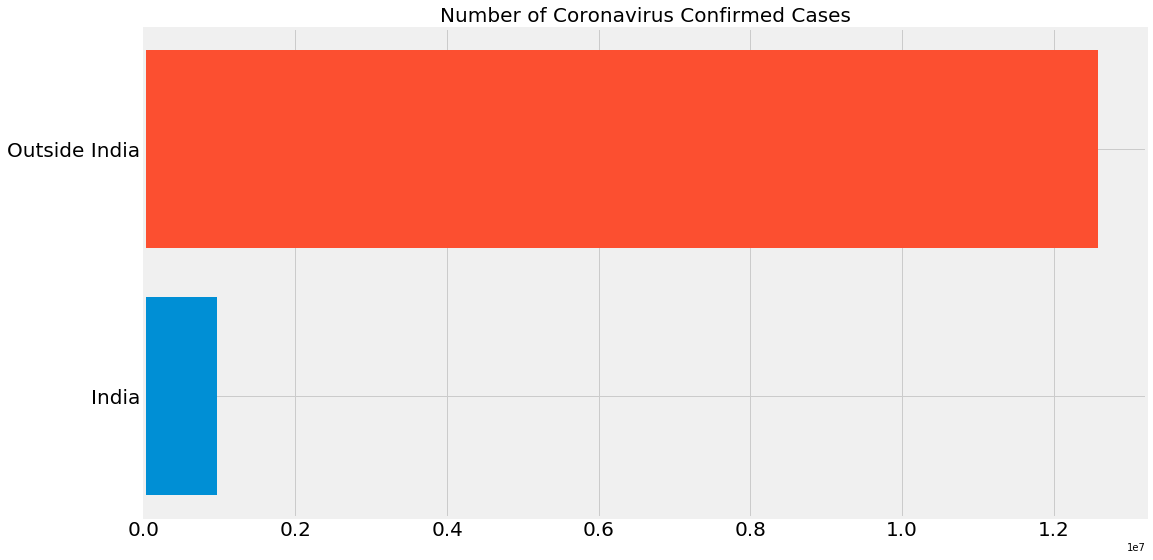

In [40]:
india_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_india_confirmed = np.sum(confirmed_by_country) - india_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', india_confirmed)
plt.barh('Outside India', outside_india_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [41]:
print('Outside India: {} cases'.format(outside_india_confirmed))
print('India: {} cases'.format(india_confirmed))
print('Total: {} cases'.format(india_confirmed+outside_india_confirmed))

Outside India: 12588317 cases
India: 968857 cases
Total: 13557174 cases


In [42]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [43]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

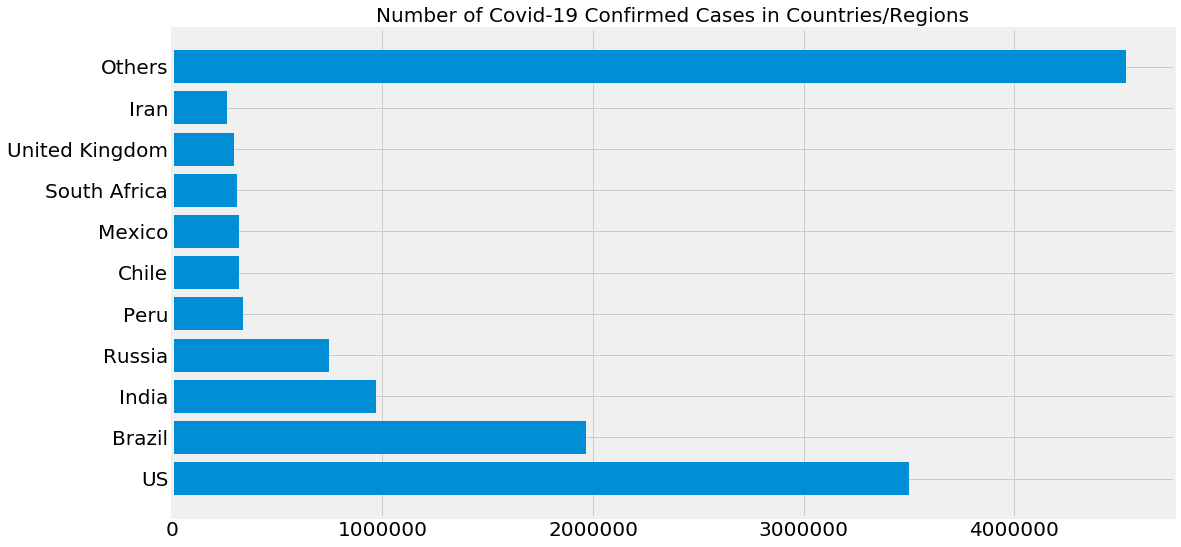

In [44]:

plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [45]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

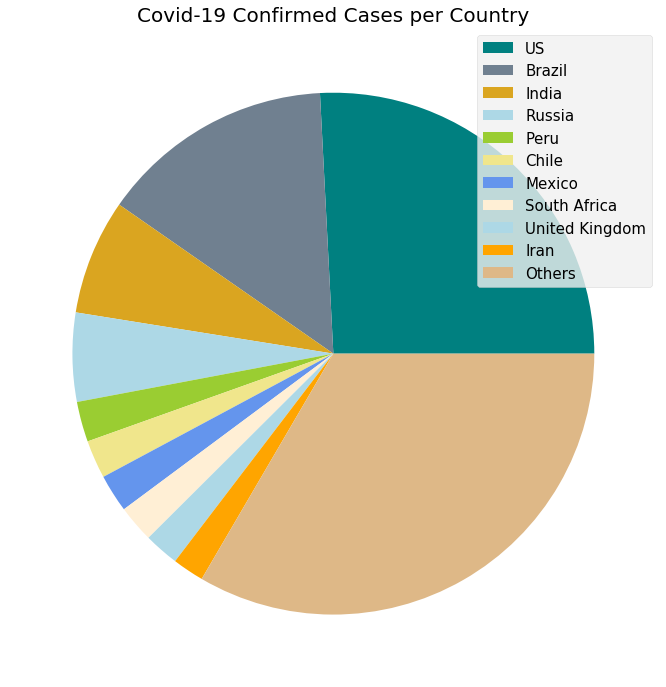

In [46]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [47]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

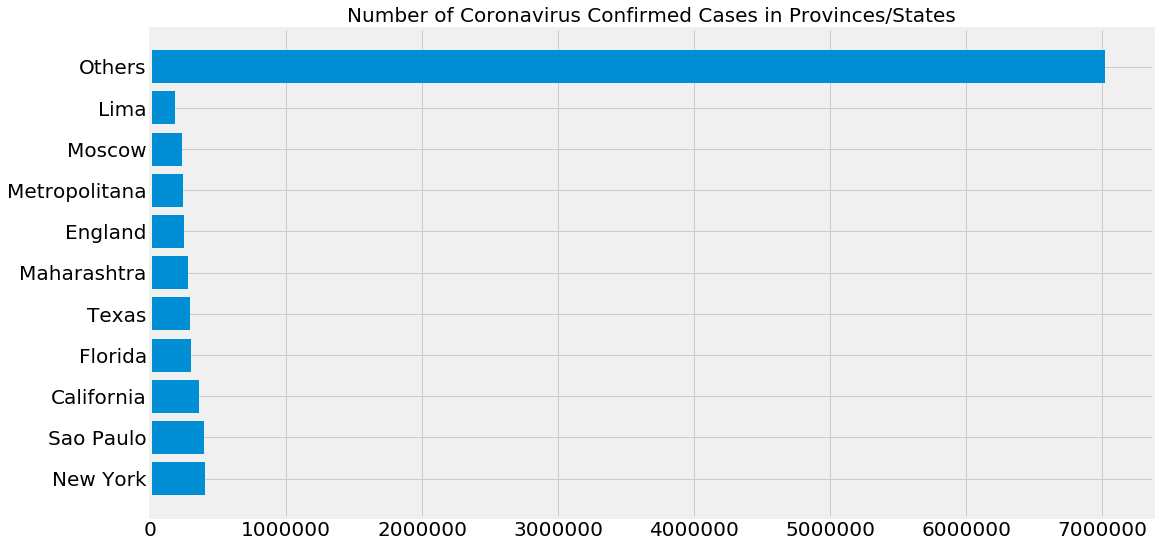

In [48]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [49]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

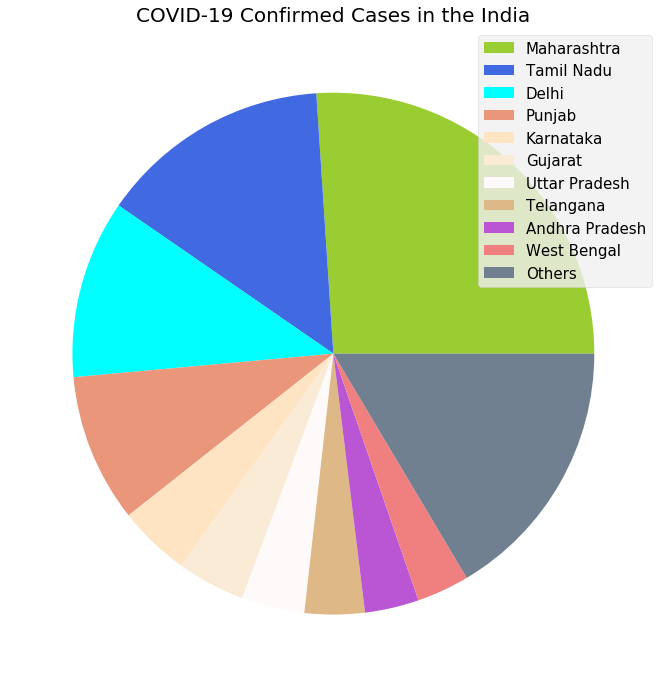

In [50]:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in the India')

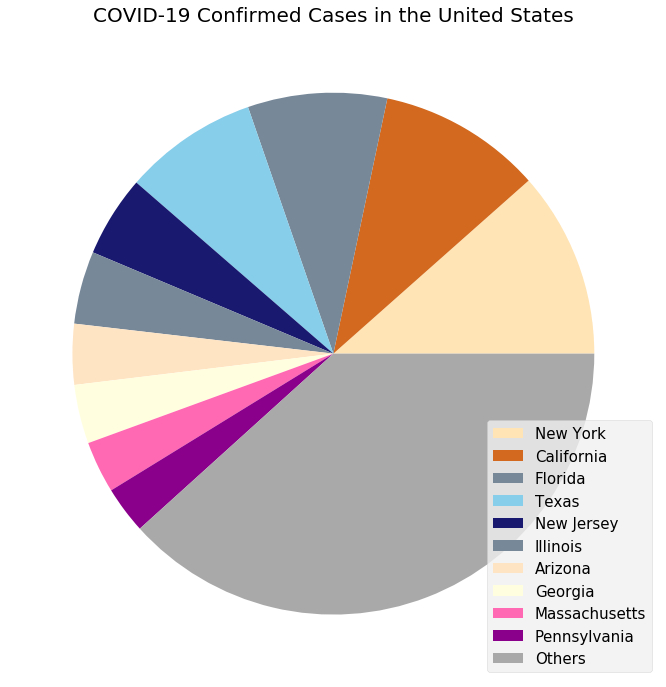

In [51]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

In [52]:
# Predicting future

In [53]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [54]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [55]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [56]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [57]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)

In [58]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [59]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
r2=r2_score(test_linear_pred,y_test_confirmed)
mse=mean_squared_error(test_linear_pred, y_test_confirmed)
print('R-square:',r2)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mse)
print('RMSE:',math.sqrt(mse))

R-square: 0.975673326722398
MAE: 1419127.5352638732
MSE: 2470580501097.8574
RMSE: 1571808.035702152


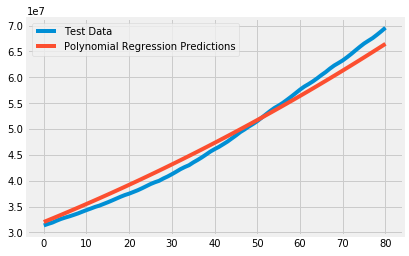

In [60]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [71]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/Users/bharathsimha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 42543541.569404826
MSE: 2369580770694106.0
RMSE:  48678339.85145864


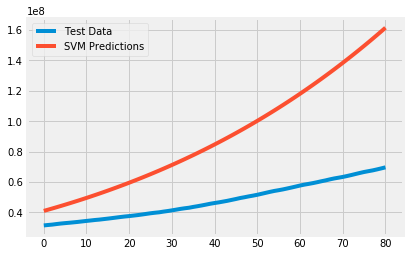

In [72]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
svm_mse=mean_squared_error(svm_test_pred, y_test_confirmed)
print('MSE:',svm_mse)
print('RMSE: ',math.sqrt(svm_mse))

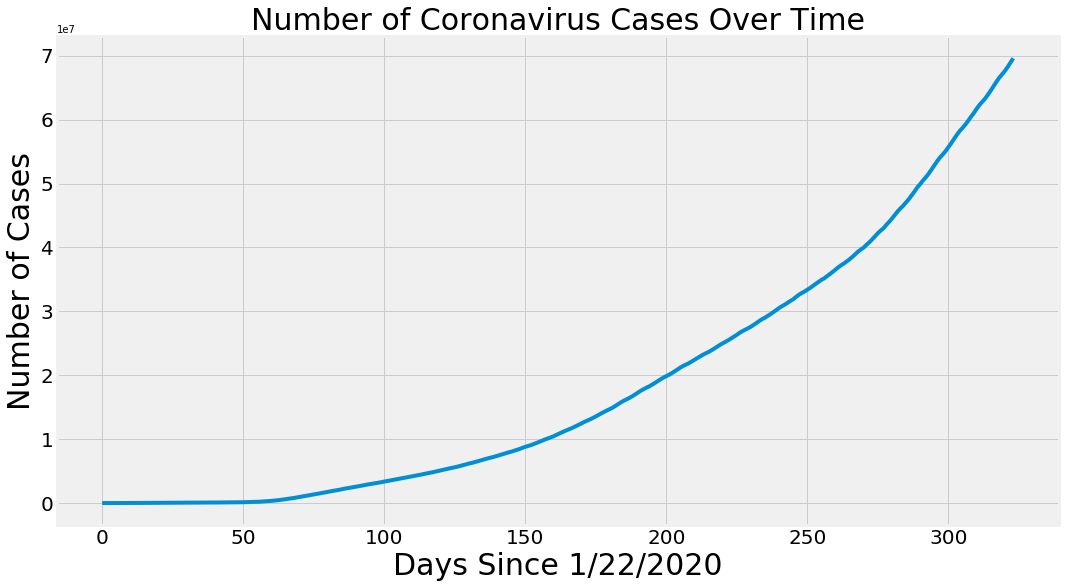

In [73]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

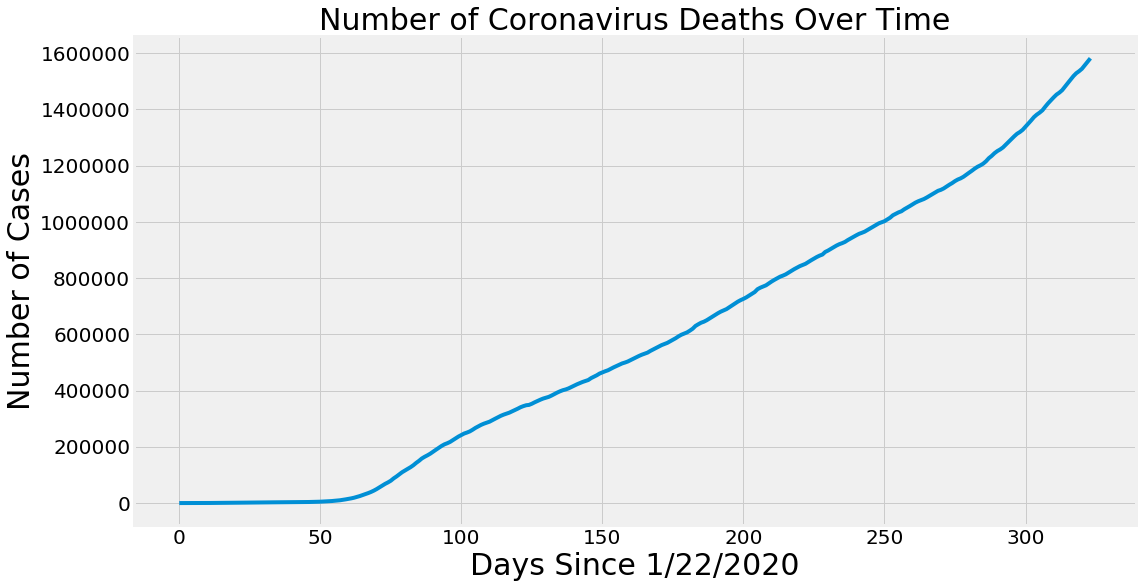

In [74]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

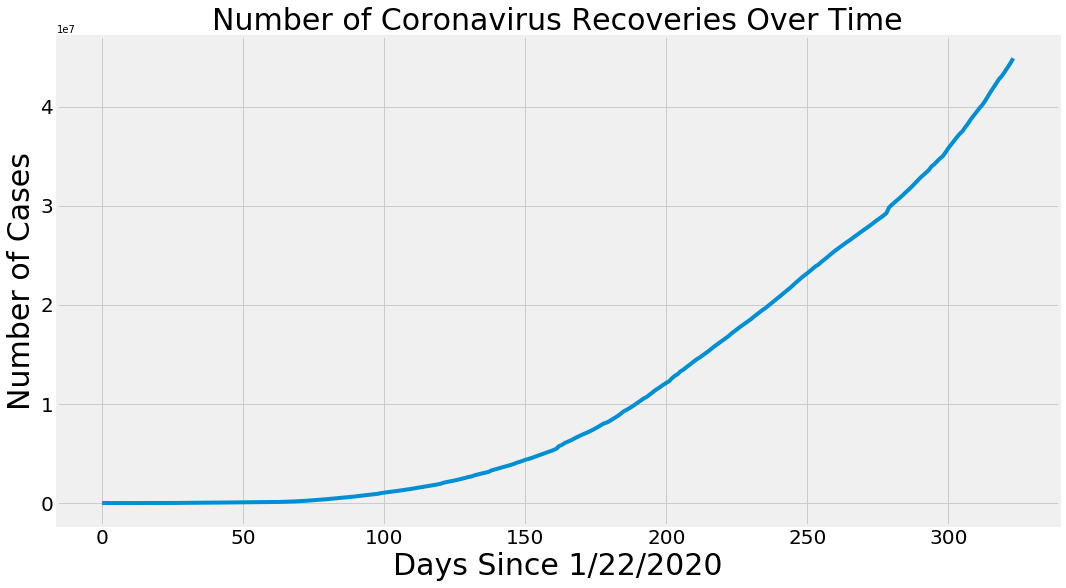

In [75]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

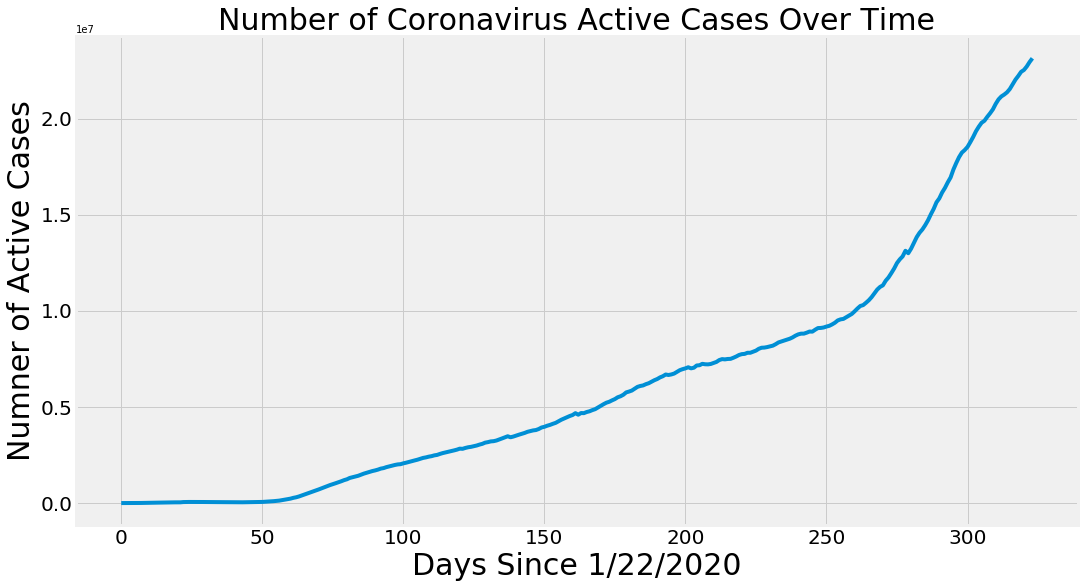

In [76]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

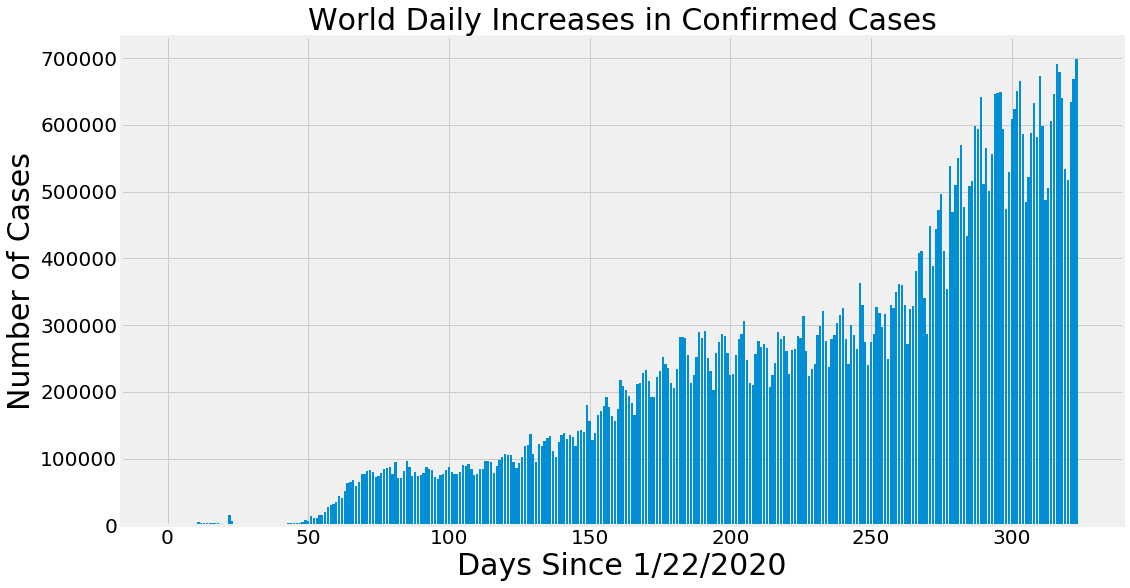

In [77]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

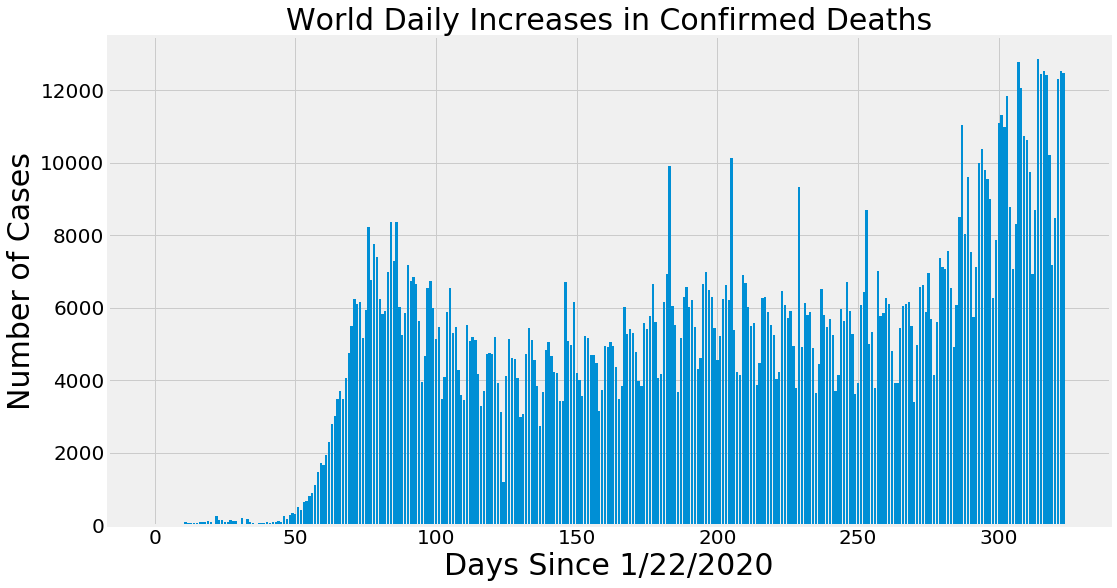

In [78]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

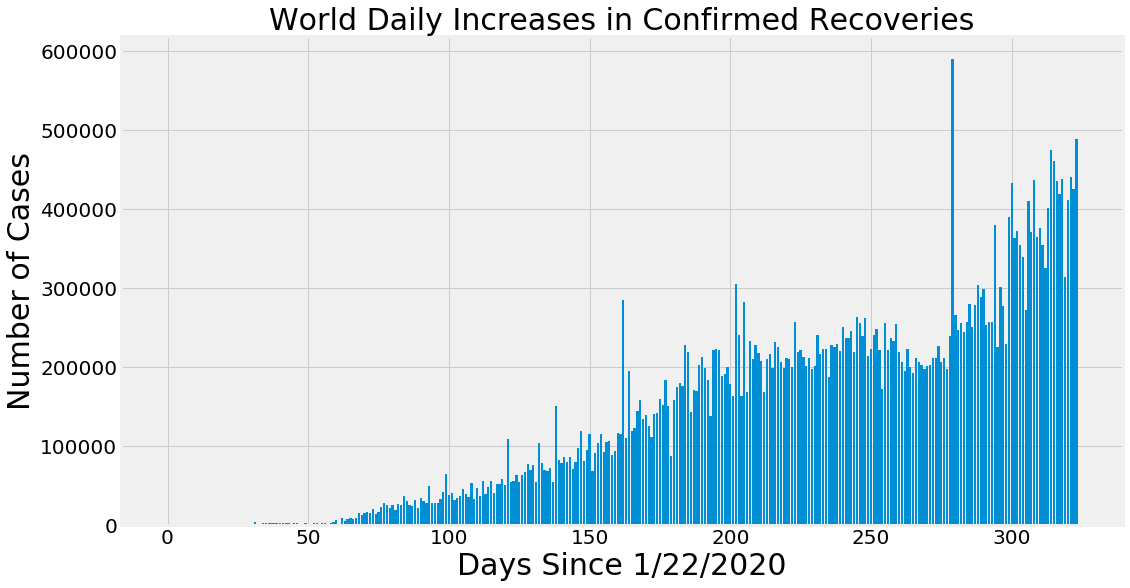

In [79]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [80]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

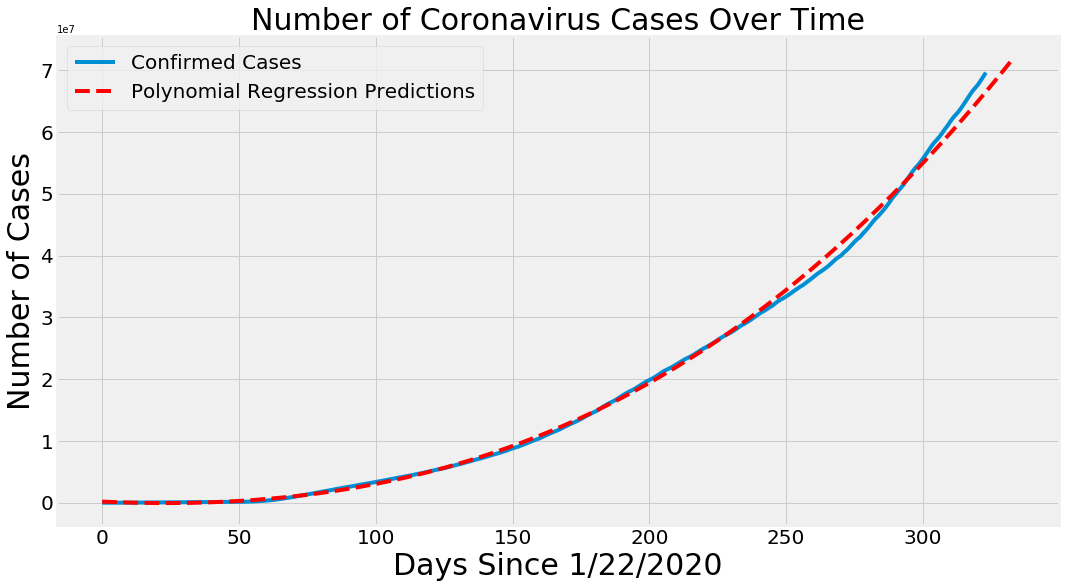

In [81]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

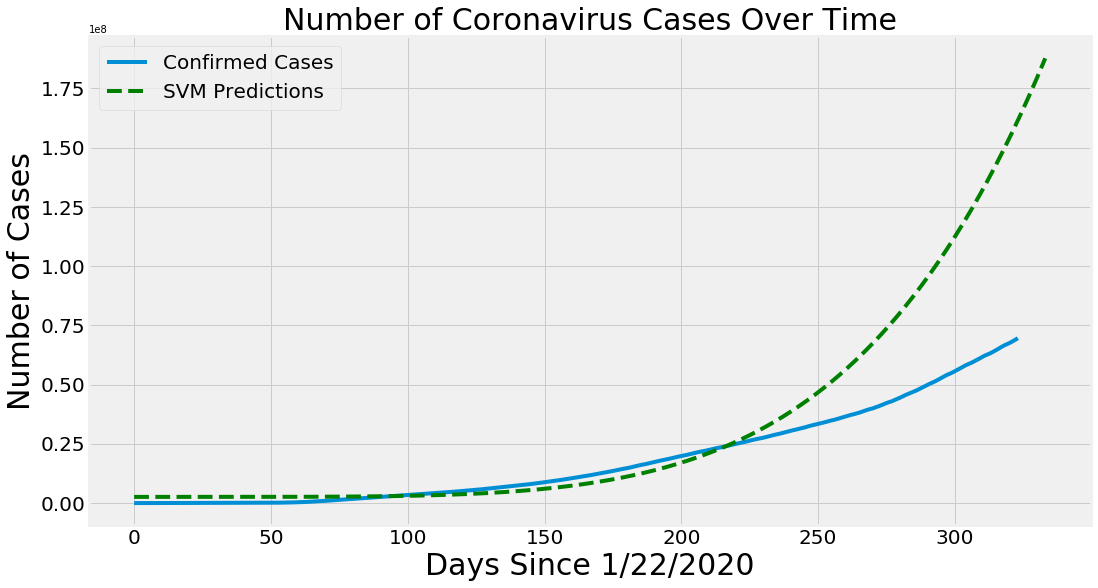

In [82]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [83]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,12/11/2020,67009870.0
1,12/12/2020,67543685.0
2,12/13/2020,68080138.0
3,12/14/2020,68619237.0
4,12/15/2020,69160986.0
5,12/16/2020,69705391.0
6,12/17/2020,70252459.0
7,12/18/2020,70802194.0
8,12/19/2020,71354603.0
9,12/20/2020,71909691.0


In [84]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,12/11/2020,164025537.0
1,12/12/2020,166532069.0
2,12/13/2020,169069641.0
3,12/14/2020,171638540.0
4,12/15/2020,174239057.0
5,12/16/2020,176871481.0
6,12/17/2020,179536106.0
7,12/18/2020,182233225.0
8,12/19/2020,184963136.0
9,12/20/2020,187726136.0


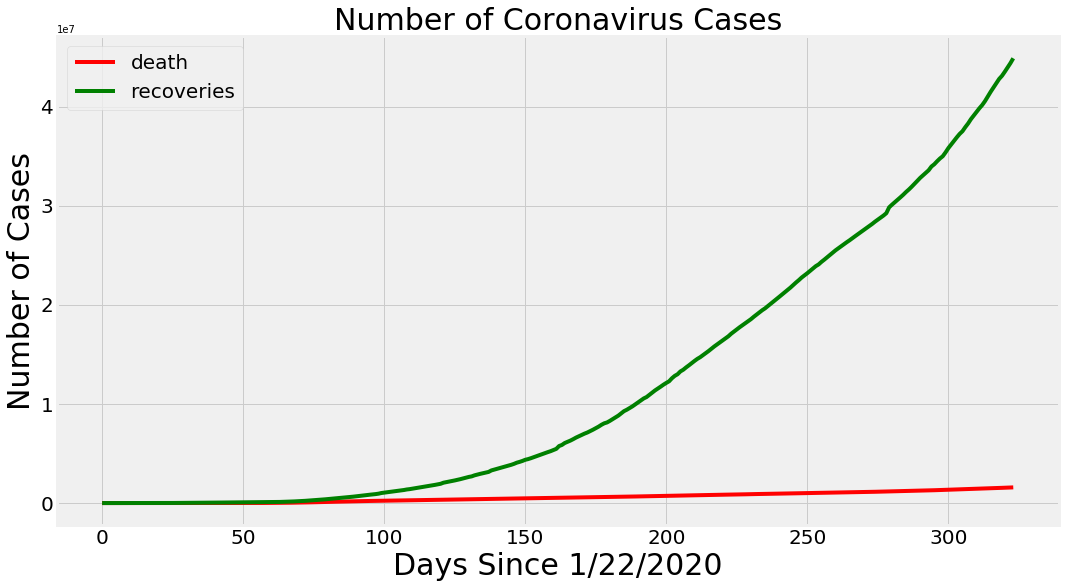

In [85]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

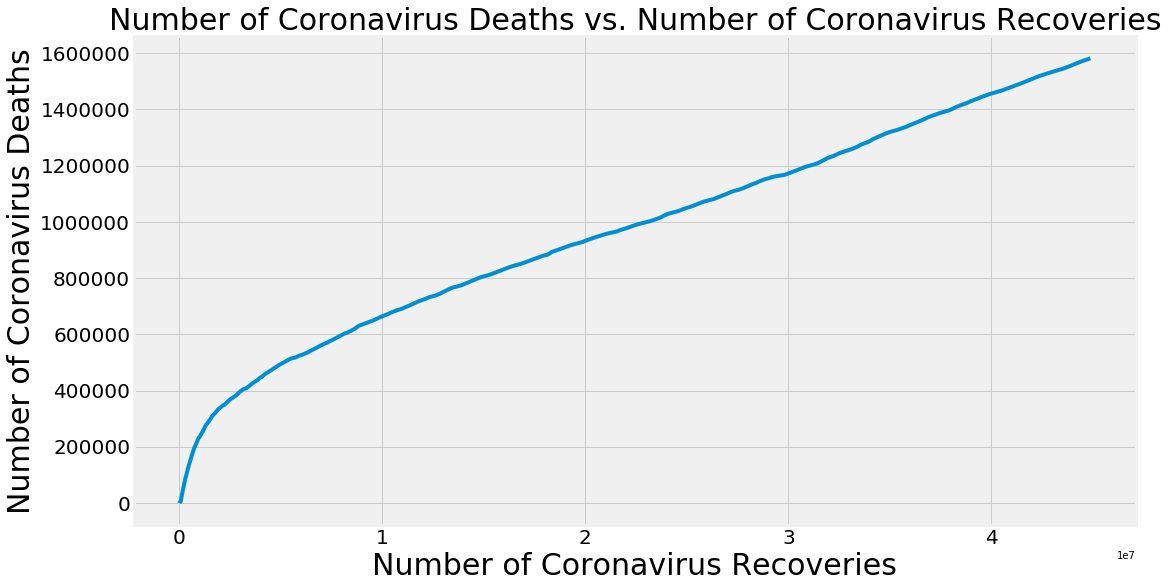

In [86]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [87]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

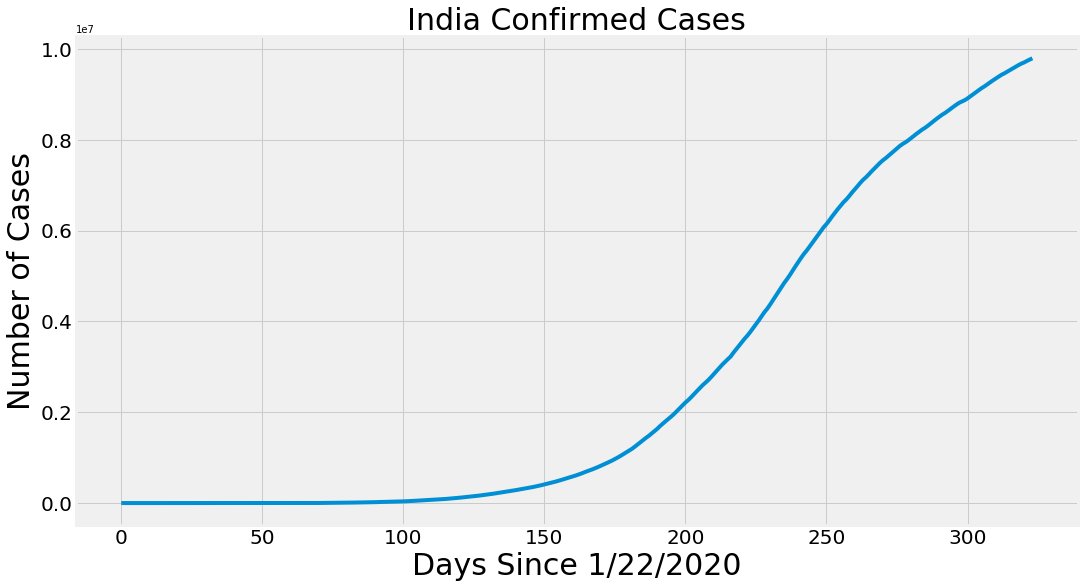

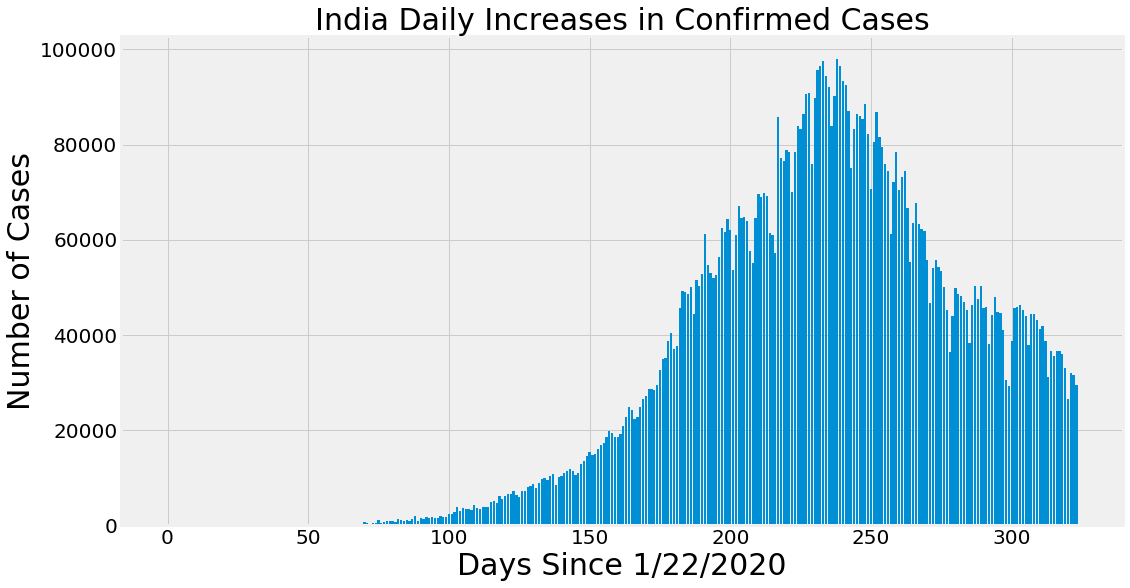

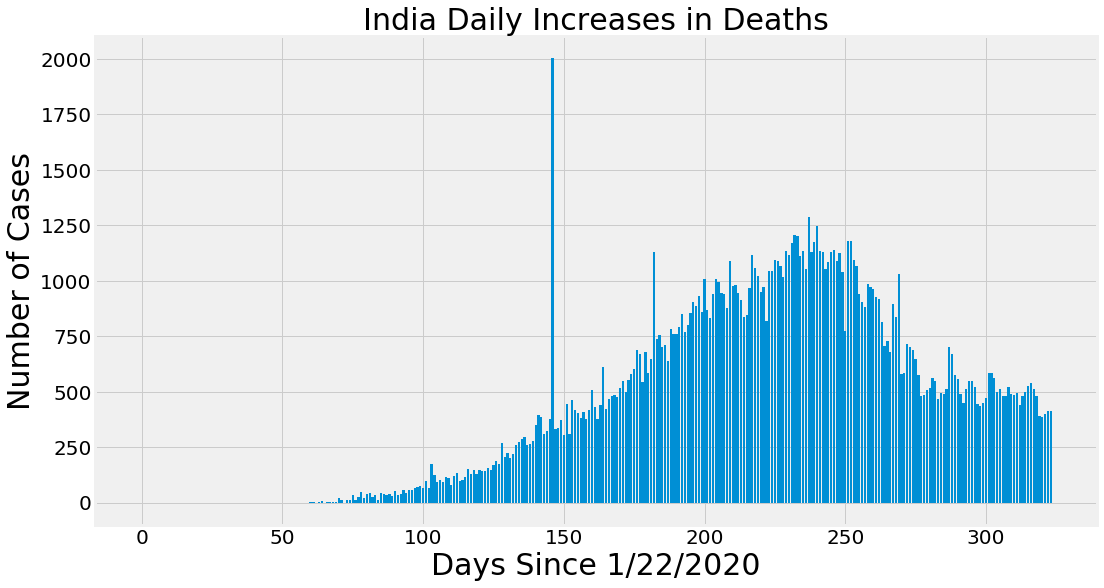

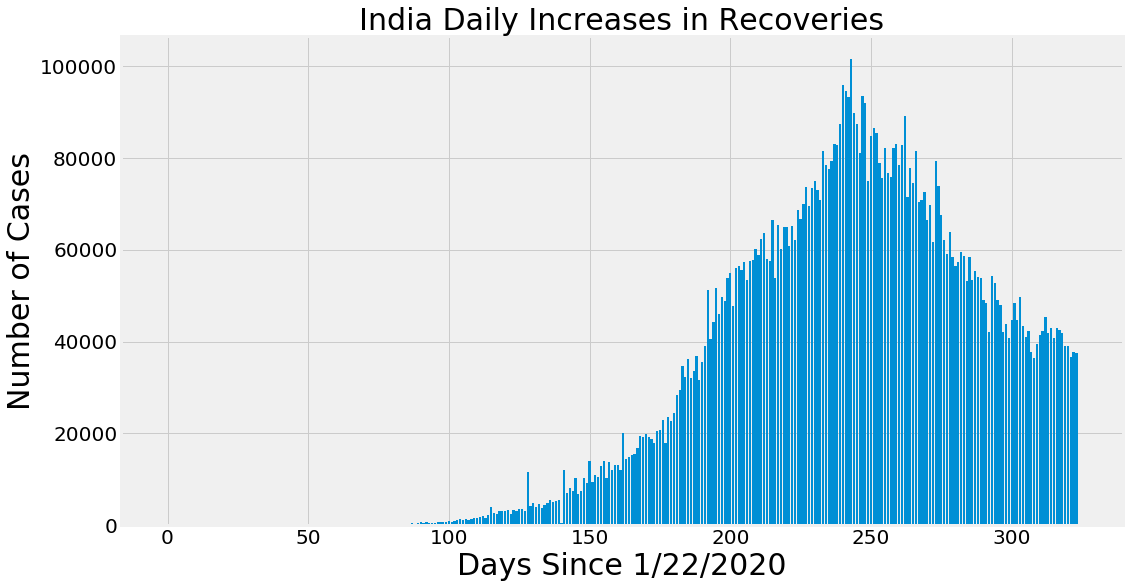

In [88]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

##  Death cases prediction

In [89]:
# polynomial regression deaths

In [124]:
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.25, shuffle=False) 

In [125]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_deaths = poly.fit_transform(X_train_deaths)
poly_X_test_deaths = poly.fit_transform(X_test_deaths)
poly_future_forecast = poly.fit_transform(future_forecast)

In [126]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_deaths, y_train_deaths)
test_linear_pred = linear_model.predict(poly_X_test_deaths)
linear_pred = linear_model.predict(poly_future_forecast)
r2=r2_score(test_linear_pred,y_test_deaths)
mse=mean_squared_error(test_linear_pred, y_test_deaths)
print('R-square:',r2)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_deaths))
print('MSE:', mse)
print('RMSE:',math.sqrt(mse))

R-square: 0.7992301544151892
MAE: 79634.52737551145
MSE: 6794733084.4088
RMSE: 82430.17095947819


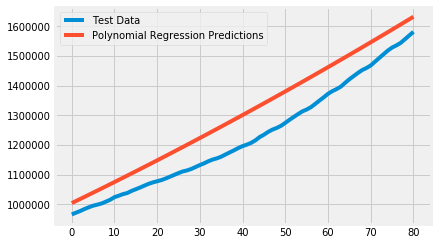

In [127]:
plt.plot(y_test_deaths)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [128]:
# svm deaths

In [129]:
# svm_deaths = svm_search.best_estimator_
svm_deaths = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_deaths.fit(X_train_deaths, y_train_deaths)
svm_pred = svm_deaths.predict(future_forecast)

/Users/bharathsimha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2196313.5029353476
MSE: 6101283788735.894
RMSE:  2470077.6888057375


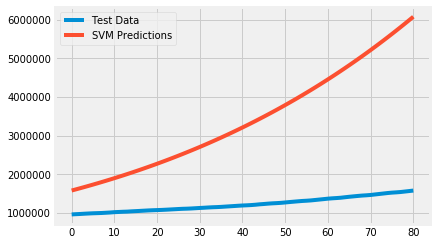

In [130]:
svm_test_pred = svm_deaths.predict(X_test_deaths)
plt.plot(y_test_deaths)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_deaths))
svm_mse=mean_squared_error(svm_test_pred, y_test_deaths)
print('MSE:',svm_mse)
print('RMSE: ',math.sqrt(svm_mse))

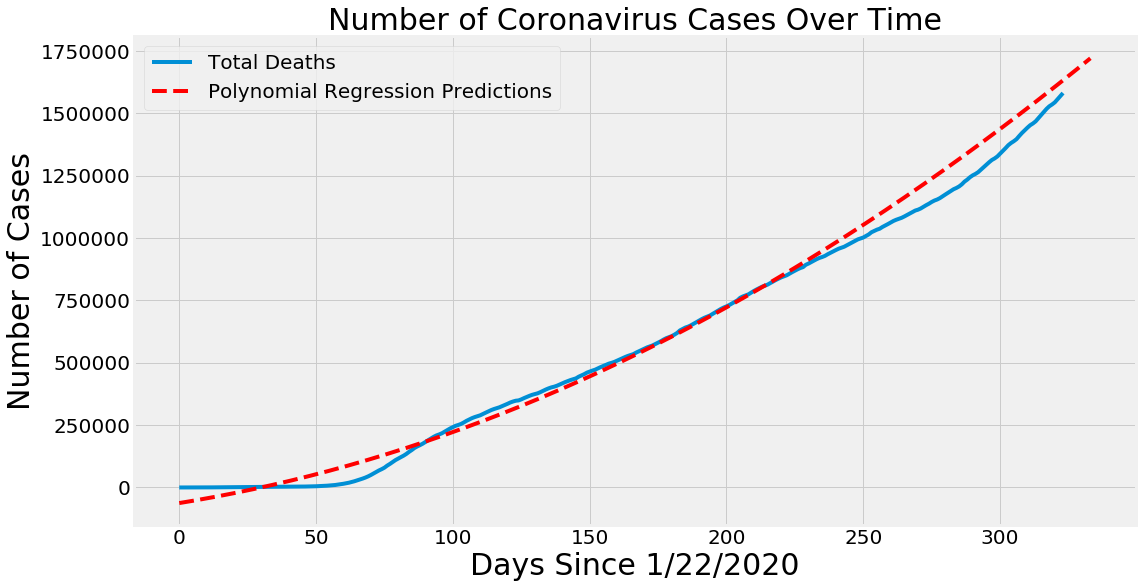

In [131]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Total Deaths', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
plot_predictions(adjusted_dates, total_deaths, linear_pred, 'Polynomial Regression Predictions', 'red')

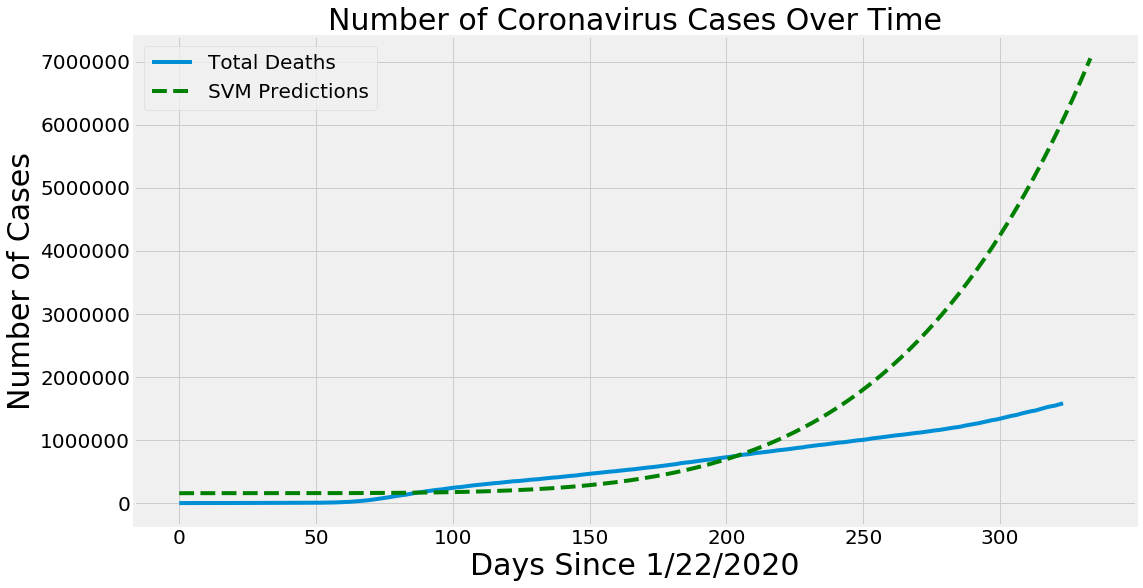

In [132]:
plot_predictions(adjusted_dates, total_deaths, svm_pred, 'SVM Predictions', 'green')

In [106]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Total Deaths Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Total Deaths Worldwide
0,12/11/2020,1641586.0
1,12/12/2020,1650345.0
2,12/13/2020,1659125.0
3,12/14/2020,1667927.0
4,12/15/2020,1676750.0
5,12/16/2020,1685594.0
6,12/17/2020,1694461.0
7,12/18/2020,1703349.0
8,12/19/2020,1712258.0
9,12/20/2020,1721189.0


In [107]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'SVM Predicted # of Total Deaths Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Total Deaths Worldwide
0,12/11/2020,6169625.0
1,12/12/2020,6262992.0
2,12/13/2020,6357516.0
3,12/14/2020,6453208.0
4,12/15/2020,6550076.0
5,12/16/2020,6648134.0
6,12/17/2020,6747390.0
7,12/18/2020,6847858.0
8,12/19/2020,6949546.0
9,12/20/2020,7052468.0


# Recovered cases

In [108]:
# polynomial regression recovered

In [109]:
X_train_recoveries, X_test_recoveries, y_train_recoveries, y_test_recoveries = train_test_split(days_since_1_22, total_recovered, test_size=0.25, shuffle=False) 

In [110]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_recoveries = poly.fit_transform(X_train_recoveries)
poly_X_test_recoveries = poly.fit_transform(X_test_recoveries)
poly_future_forecast = poly.fit_transform(future_forecast)

In [111]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_deaths, y_train_recoveries)
test_linear_pred = linear_model.predict(poly_X_test_recoveries)
linear_pred = linear_model.predict(poly_future_forecast)
r2=r2_score(test_linear_pred,y_test_recoveries)
mse=mean_squared_error(test_linear_pred, y_test_recoveries)
print('R-square:',r2)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recoveries))
print('MSE:', mse)
print('RMSE:',math.sqrt(mse))

R-square: 0.9926188705644384
MAE: 443055.26197443495
MSE: 312616293641.16254
RMSE: 559121.0008944061


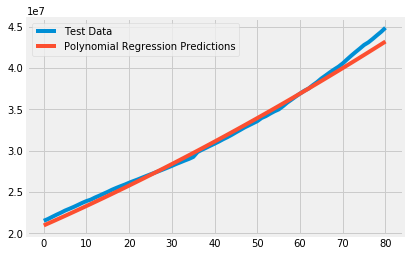

In [112]:
plt.plot(y_test_recoveries)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [113]:
# svm recovered

In [114]:
# svm_recovered = svm_search.best_estimator_
svm_recoveries = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_recoveries.fit(X_train_recoveries, y_train_recoveries)
svm_pred = svm_recoveries.predict(future_forecast)

/Users/bharathsimha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 28235521.7069412
MSE: 825385819655169.1
RMSE:  28729528.705761414


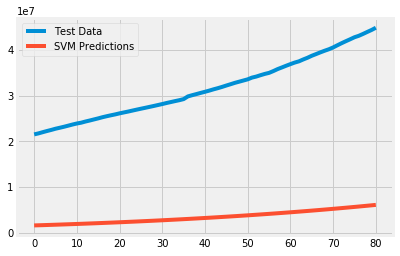

In [115]:
svm_test_pred = svm_deaths.predict(X_test_recoveries)
plt.plot(y_test_recoveries)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_recoveries))
svm_mse=mean_squared_error(svm_test_pred, y_test_recoveries)
print('MSE:',svm_mse)
print('RMSE: ',math.sqrt(svm_mse))

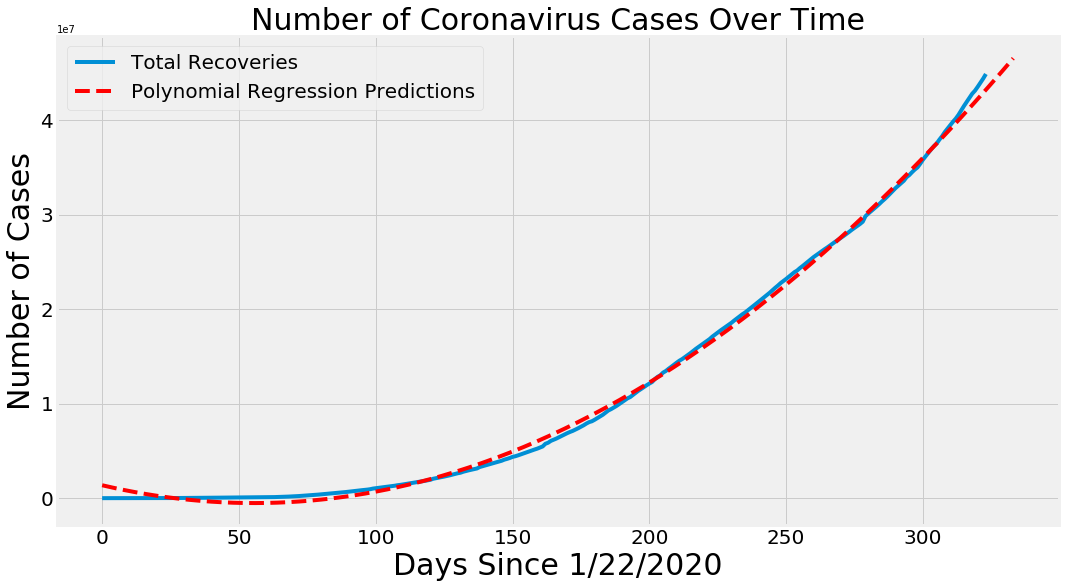

In [120]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Total Recoveries', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
plot_predictions(adjusted_dates, total_recovered, linear_pred, 'Polynomial Regression Predictions', 'red')

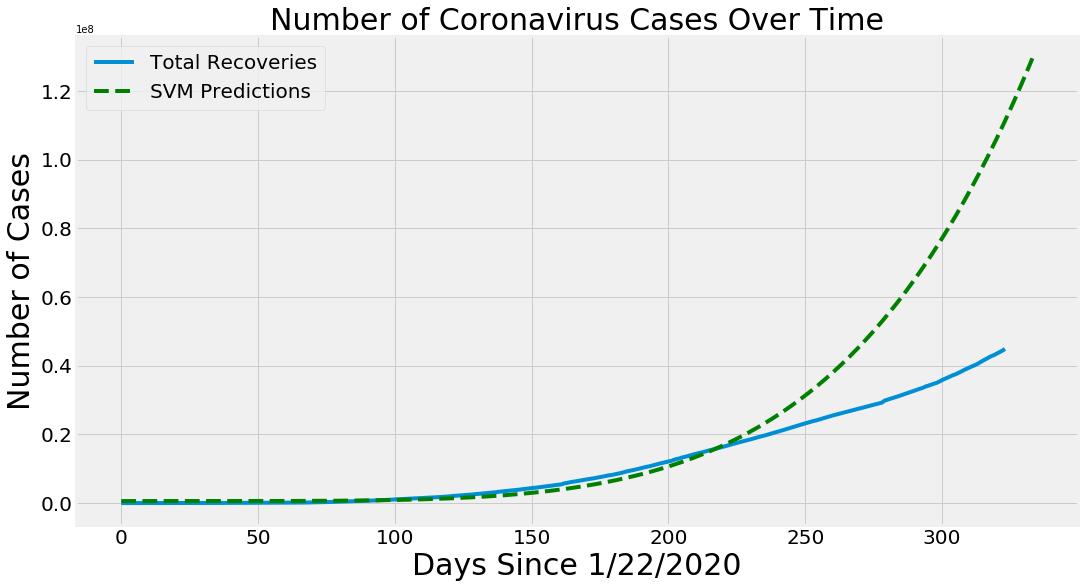

In [121]:
plot_predictions(adjusted_dates, total_recovered, svm_pred, 'SVM Predictions', 'green')

In [122]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted number of Total Recoveries Worldwide': np.round(linear_pred[-10:])})
poly_df

,Date,Predicted number of Total Recoveries Worldwide
0,12/11/2020,43529485.0
1,12/12/2020,43858270.0
2,12/13/2020,44188277.0
3,12/14/2020,44519506.0
4,12/15/2020,44851958.0
5,12/16/2020,45185632.0
6,12/17/2020,45520529.0
7,12/18/2020,45856649.0
8,12/19/2020,46193990.0
9,12/20/2020,46532555.0


In [123]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-10:], 'SVM Predicted # of Total Recoveries Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Total Recoveries Worldwide
0,12/11/2020,113003328.0
1,12/12/2020,114748950.0
2,12/13/2020,116516191.0
3,12/14/2020,118305248.0
4,12/15/2020,120116324.0
5,12/16/2020,121949622.0
6,12/17/2020,123805345.0
7,12/18/2020,125683699.0
8,12/19/2020,127584889.0
9,12/20/2020,129509124.0
